In [224]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [225]:
#loading the housing data
house_data = pd.read_excel('housing_data.xlsx')

In [226]:
#Printing the first few lines
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [227]:
#Extract input (X) and output (Y) data from the dataset.
x_feature = house_data.iloc[:, 0:-1]
y_target = house_data.loc[:, ['median_house_value']]

In [228]:
#feature everything except median_house_value
x_feature.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [229]:
#Target is median_house_value
y_target.head()

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200


In [230]:
#Fill the missing values with the mean of the respective column
#We see that total_bedrooms has null value
x_feature.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
dtype: bool

In [231]:
#CHecking how many null values
x_feature.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [232]:
x_feature.iloc[290:293, :]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY
291,-122.16,37.77,48,977,194.0,446,180,4.7708,NEAR BAY
292,-122.16,37.77,45,2324,397.0,968,384,3.5739,NEAR BAY


In [233]:
x_feature.total_bedrooms.mean()

537.8705525375618

In [234]:
#Filling total_bedrooms with the mean of total_bedrooms
x_feature.total_bedrooms.fillna(x_feature.total_bedrooms.mean(), inplace = True)

In [235]:
x_feature.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
dtype: object

In [236]:
#Convert categorical column in the dataset to numerical data.
#We see ocean_proximity is categorical data
x_feature.iloc[290:293, :]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
290,-122.16,37.77,47,1256,537.870553,570,218,4.3750,NEAR BAY
291,-122.16,37.77,48,977,194.000000,446,180,4.7708,NEAR BAY
292,-122.16,37.77,45,2324,397.000000,968,384,3.5739,NEAR BAY


In [237]:
#So to convert ocean_proximity, we will Pandas dummy variable then we will concat this data with the other features
x_feature.groupby('ocean_proximity').size()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64

In [238]:
x = x_feature['ocean_proximity'].str.get_dummies()
x_features = pd.concat([x_feature.drop(['ocean_proximity'], axis =1), x], axis = 1)

In [239]:
x_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0


In [240]:
#Checking the data types of x_features.
x_features.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
<1H OCEAN               int64
INLAND                  int64
ISLAND                  int64
NEAR BAY                int64
NEAR OCEAN              int64
dtype: object

In [241]:
x_features.loc[290:293, 'total_bedrooms']

290    537.870553
291    194.000000
292    397.000000
293    349.000000
Name: total_bedrooms, dtype: float64

In [242]:
x_features.total_bedrooms.mean()

537.8705525375639

In [243]:
#longitude and latitude will not help our model so we will drop them
x_features = x_features.drop(['longitude','latitude'], axis = 'columns')

In [244]:
x_features.iloc[290:293, :]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
290,47,1256,537.870553,570,218,4.3750,0,0,0,1,0
291,48,977,194.000000,446,180,4.7708,0,0,0,1,0
292,45,2324,397.000000,968,384,3.5739,0,0,0,1,0


In [245]:
x_features.shape

(20640, 11)

In [246]:
y_target.shape

(20640, 1)

In [247]:
#Split the data into 80% training dataset and 20% test dataset.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.2, random_state = 1)

In [248]:
x_train.shape

(16512, 11)

In [249]:
y_train.shape

(16512, 1)

In [264]:
#Standardize training and test datasets.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [268]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [281]:
#Perform Linear Regression on training data.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [282]:
#Predict output for test dataset using the fitted model.
predict = model.predict(x_test)
print(predict)

[[ 0.31120225]
 [-0.98278118]
 [ 0.30847265]
 ...
 [ 0.59224681]
 [ 0.58981548]
 [-0.6432792 ]]


In [284]:
#Print root mean squared error (RMSE) from Linear Regression.
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predict)
print('Root Mean Squared Error(RMSE) is %.2f' %mse)
#Since our RMSE value is .37, We can sat that our model can predict the data accurately

Root Mean Squared Error(RMSE) is 0.37


In [294]:
x_train.view

<function ndarray.view>

In [302]:
#Perform Linear Regression with one independent variable:
#Extract just the median_income column from the independent variables (from X_train and X_test).
x_train_median_income = x_train[:,[5]]
x_test_median_income = x_test[:,[5]]

In [311]:
#Perform Linear Regression to predict housing values based on median_income.
median_income_model = LinearRegression()
median_income_model.fit(x_train_median_income, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [313]:
#Predict output for test dataset using the fitted model.
predict_with_median_income = median_income_model.predict(x_test_median_income)
print(predict_with_median_income)

[[-0.22781174]
 [-0.69045767]
 [ 0.04986313]
 ...
 [ 0.42635417]
 [ 0.36341163]
 [-0.42595343]]


In [317]:
#Plot the fitted model for training data as well as for test data to check if 
#the fitted model satisfies the test data.
import matplotlib.pyplot as plt
%matplotlib inline

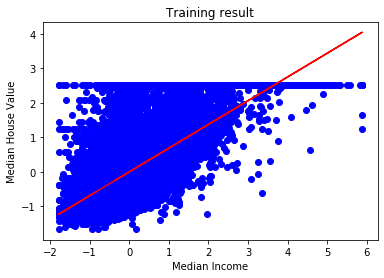

In [321]:
plt.scatter(x_train_median_income, y_train, color = 'blue')
plt.plot (x_train_median_income, median_income_model.predict(x_train_median_income), color = 'red')
plt.title ('Training result')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

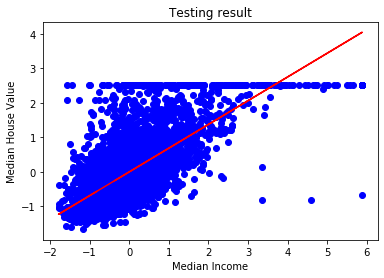

In [323]:
plt.scatter(x_test_median_income, y_test, color = 'blue')
plt.plot (x_train_median_income, median_income_model.predict(x_train_median_income), color = 'red')
plt.title ('Testing result')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()